# Project: Depression dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



## Import and cleaning

In [69]:
df = pd.read_csv('depression_data.csv')
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [71]:
df.isnull().sum()

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

In [72]:
display(df.describe())

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [73]:
# print a count of each data category if they are categorical
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col])==False:
        print(df[col].value_counts())
        print("\n")

Name
Michael Smith      198
Michael Johnson    147
David Smith        131
Robert Smith       128
David Johnson      126
                  ... 
Corey Moore          1
Carl Ballard         1
Carla Mcgrath        1
Cory Wise            1
Gary Faulkner        1
Name: count, Length: 196851, dtype: int64


Marital Status
Married     240444
Single       72110
Widowed      68485
Divorced     32729
Name: count, dtype: int64


Education Level
Bachelor's Degree    124329
High School          118927
Associate Degree      79999
Master's Degree       73768
PhD                   16745
Name: count, dtype: int64


Smoking Status
Non-smoker    247416
Former        116184
Current        50168
Name: count, dtype: int64


Physical Activity Level
Sedentary    176850
Moderate     158013
Active        78905
Name: count, dtype: int64


Employment Status
Employed      265659
Unemployed    148109
Name: count, dtype: int64


Alcohol Consumption
Moderate    173440
Low         139250
High        101078
Name: count,

In [74]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [75]:
# Get rid of variables that are not useful for the analysis
df = df.drop('Name', axis=1)
df.columns

Index(['Age', 'Marital Status', 'Education Level', 'Number of Children',
       'Smoking Status', 'Physical Activity Level', 'Employment Status',
       'Income', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History of Mental Illness', 'History of Substance Abuse',
       'Family History of Depression', 'Chronic Medical Conditions'],
      dtype='object')

## Transformation of the data

### Modifications in have children

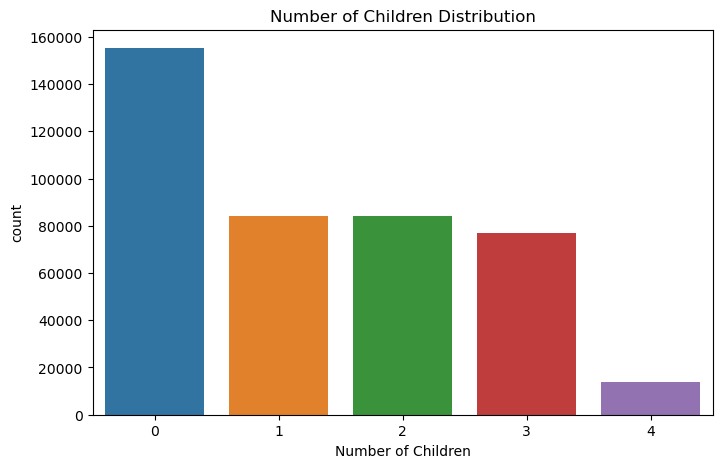

In [76]:
# Visualization of number of children
plt.figure(figsize=(8,5))
sns.countplot(x='Number of Children', data=df)
plt.title('Number of Children Distribution')
plt.show()

In [77]:
df['Has_children'] = (df['Number of Children'] > 0).astype(int)
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Has_children
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes,1
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes,1
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No,1
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No,1
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes,0


c:\Users\roy_l\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


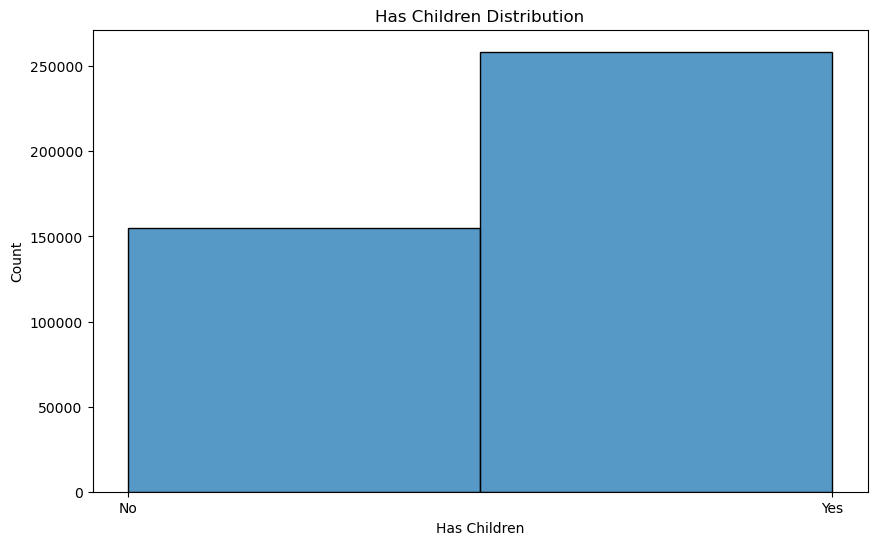

In [78]:
# Visualization of has children distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Has_children'], bins=2)
xlabels = ['No', 'Yes']
plt.xticks(ticks=[0,1], labels=xlabels)
plt.title('Has Children Distribution')
plt.xlabel('Has Children')
plt.ylabel('Count')
plt.show()

### Modifications in ages

c:\Users\roy_l\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


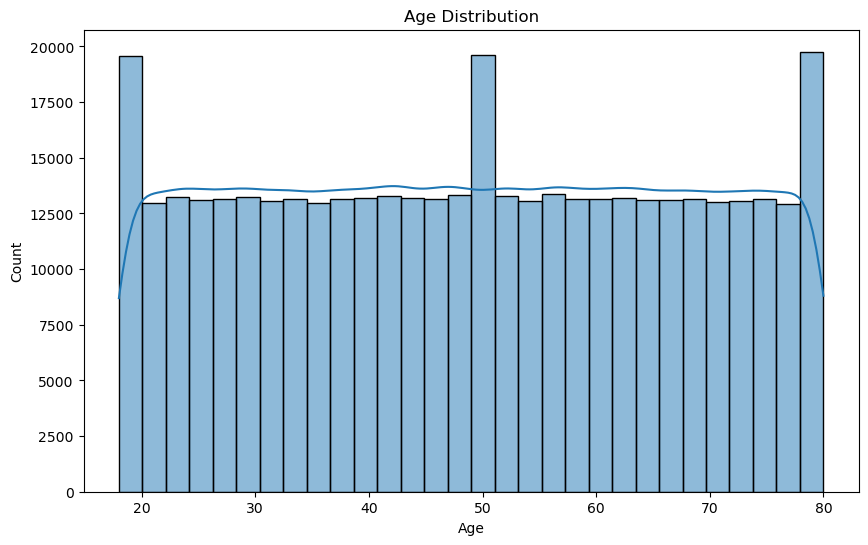

In [79]:
# Visualization of age distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

In [80]:
# Grouping the data in age brackets
# Use of pd.cut to create age groups: https://pandas.pydata.org/docs/reference/api/pandas.cut.html
bins = [0, 12, 19, 35, 50, 65, 100]

df["Age_group"] = pd.cut(df["Age"], bins, labels=["Child", "Teen", "Young Adult", "Adult", "Middle Age", "Senior"])
df.head(-5)

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Has_children,Age_group
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes,1,Young Adult
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes,1,Middle Age
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No,1,Senior
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No,1,Middle Age
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes,0,Teen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413758,61,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,16867.23,Low,Moderate,Fair,No,Yes,Yes,No,1,Middle Age
413759,20,Single,Bachelor's Degree,0,Current,Sedentary,Employed,54483.50,Moderate,Unhealthy,Good,No,No,No,No,0,Young Adult
413760,46,Married,High School,1,Non-smoker,Sedentary,Employed,26153.32,Low,Unhealthy,Poor,Yes,No,No,Yes,1,Adult
413761,48,Married,Master's Degree,3,Non-smoker,Moderate,Employed,130842.60,Low,Healthy,Poor,No,No,No,Yes,1,Adult


c:\Users\roy_l\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


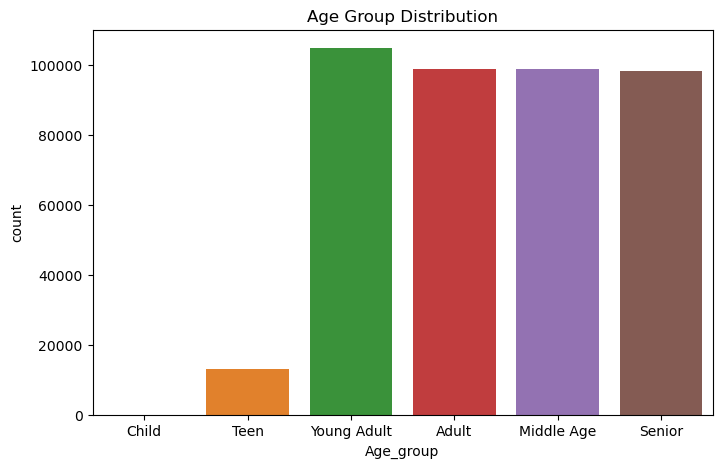

In [81]:
# Viusalization of age groups
plt.figure(figsize=(8,5))
sns.countplot(x='Age_group', data=df)
plt.title('Age Group Distribution')
plt.show()

### Modifications in income

c:\Users\roy_l\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


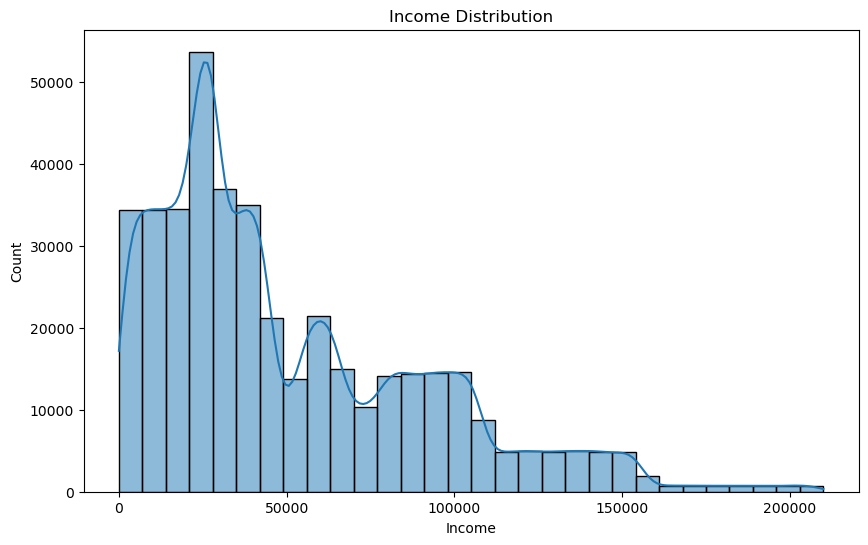

In [82]:
# Look distribution of income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.show()

In [83]:
# Print quantiles
quantiles = df['Income'].quantile([0.33, 0.66])
print(quantiles)

0.33    25530.0720
0.66    58938.0014
Name: Income, dtype: float64


In [84]:
# Separate income in quantiles
q1, q2 = df['Income'].quantile([0.33,0.66])
def income_level(income):
    if income < q1:
        return 'Low'
    elif income < q2:
        return 'Middle'
    else:
        return 'High'

df['Income_level'] = df['Income'].apply(income_level)
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Has_children,Age_group,Income_level
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes,1,Young Adult,Middle
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes,1,Middle Age,Middle
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No,1,Senior,High
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No,1,Middle Age,Low
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes,0,Teen,Low


In [85]:
# Income log transformation to reduce skewness
df['Income_log'] = np.log1p(df['Income'])

c:\Users\roy_l\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


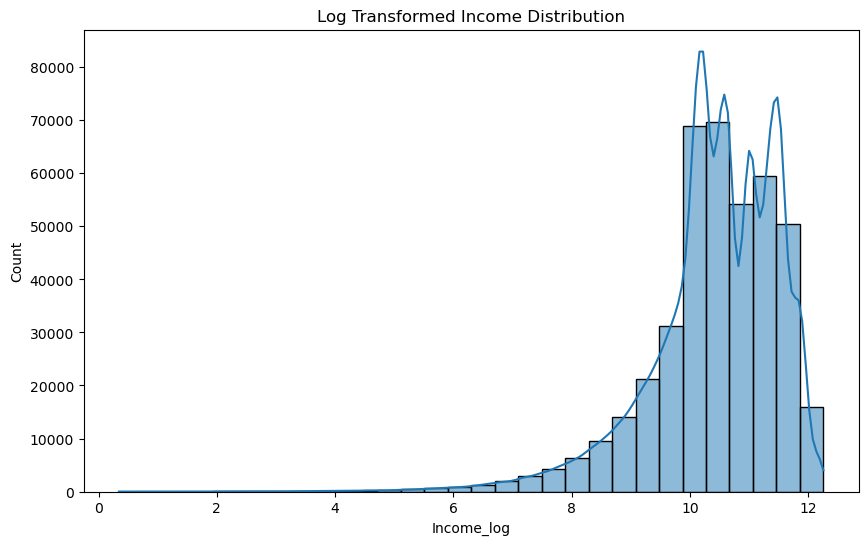

In [86]:
# Visualization of log transformed income
plt.figure(figsize=(10,6))
sns.histplot(df['Income_log'], bins=30, kde=True)
plt.title('Log Transformed Income Distribution')
plt.show()

### Lifestyle scoring

In [87]:
# Function to calculate lifestyle score
def lifestyle_score(row):
    score = 0
    if row['Physical Activity Level'] == 'Active':
        score += 1
    if row['Physical Activity Level'] == 'Sedentary':
        score -= 1
    if row['Smoking Status'] == 'Non-Smoker':
        score += 1
    if row['Smoking Status'] == 'Former':
        score -= 1
    if row['Smoking Status'] == 'Current':
        score -= 1
    if row['Alcohol Consumption'] == 'Low':
        score += 1
    if row['Alcohol Consumption'] == 'High':
        score -= 1
    if row['Dietary Habits'] == 'Healthy':
        score += 1
    if row['Dietary Habits'] == 'Unhealthy':
        score -= 1
    if row['Sleep Patterns'] == 'Good':
        score += 1
    if row['Sleep Patterns'] == 'Poor':
        score -= 1
    return score

df['Lifestyle_Score'] = df.apply(lifestyle_score, axis=1)

In [88]:
def risk_score(row):
    score = 0

    if row['History of Mental Illness'] == 'Yes':
        score += 1
    if row['History of Substance Abuse'] == 'Yes':
        score += 1
    if row['Family History of Depression'] == 'Yes':
        score += 1
    if row['Chronic Medical Conditions'] == 'Yes':
        score += 1

    return score

df['Risk_Score'] = df.apply(risk_score, axis=1)

In [89]:
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,...,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Has_children,Age_group,Income_level,Income_log,Lifestyle_Score,Risk_Score
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,...,Yes,No,Yes,Yes,1,Young Adult,Middle,10.176056,1,3
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,...,Yes,No,No,Yes,1,Middle Age,Middle,10.662220,-3,2
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,...,No,No,Yes,No,1,Senior,High,11.738736,0,1
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,...,No,No,No,No,1,Middle Age,Low,9.209718,-1,0
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,...,Yes,No,Yes,Yes,0,Teen,Low,9.059062,0,3


c:\Users\roy_l\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


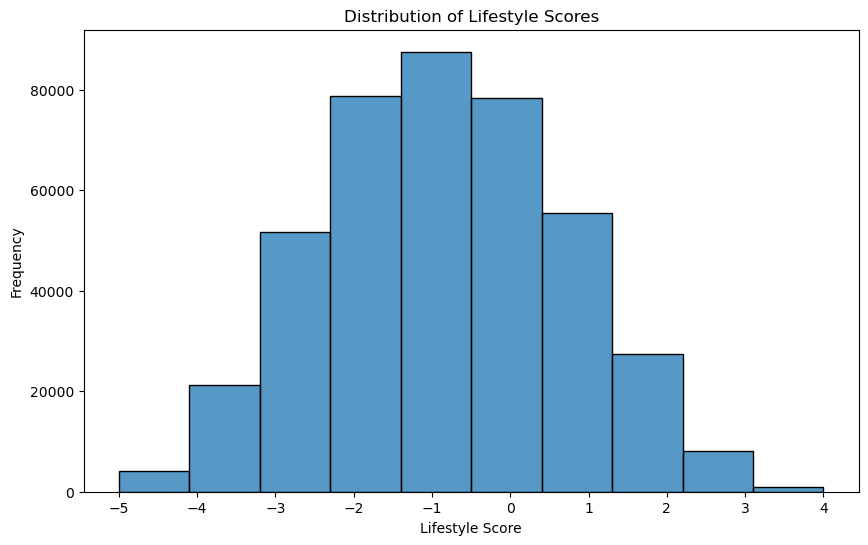

In [90]:
# Visualization of lifestyle score
plt.figure(figsize=(10,6))
sns.histplot(df['Lifestyle_Score'], bins=10)
plt.title('Distribution of Lifestyle Scores')
plt.xlabel('Lifestyle Score')
plt.ylabel('Frequency')
plt.xticks(sorted(df['Lifestyle_Score'].unique()))
plt.show()

c:\Users\roy_l\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


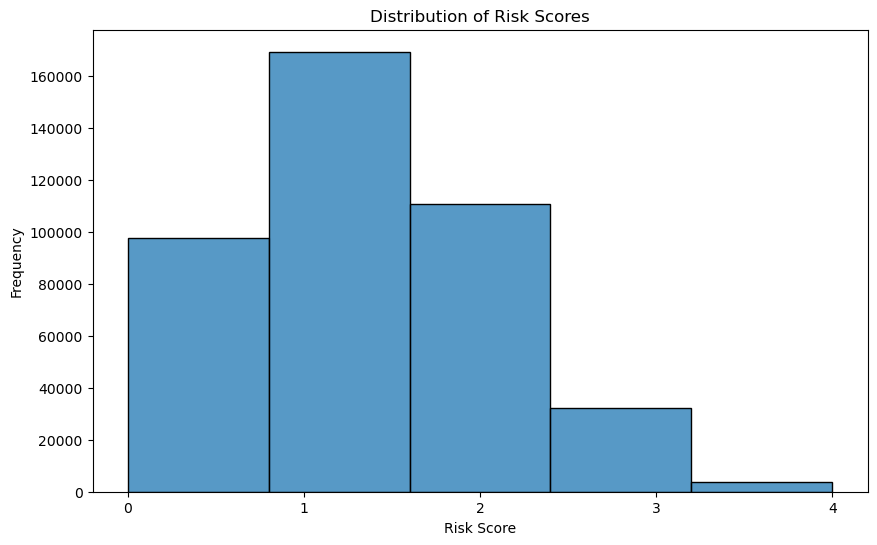

In [91]:
# Visualization of risk score
plt.figure(figsize=(10,6))
sns.histplot(df['Risk_Score'], bins=5)
plt.title('Distribution of Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.xticks(sorted(df['Risk_Score'].unique()))

plt.show()

## Engineering of the dataset

### Separation fo variables

In [264]:
# Numerical variables for clustering
numeric_cols = ['Age', 
    'Income_log', 
    'Lifestyle_Score', 
    'Risk_Score', 
    'Number of Children'
]

# Categorical variables for clustering
categorical_cols = [
    'Marital Status',
    'Employment Status',
    'Education Level',
    'Income_level',
    'Age_group',
    'Has_children'
]

# Copy dataframe for clustering
df_cluster = df[numeric_cols + categorical_cols].copy()
df_cluster.head()

,Age,Income_log,Lifestyle_Score,Risk_Score,Number of Children,Marital Status,Employment Status,Education Level,Income_level,Age_group,Has_children
0,31,10.176056,1,3,2,Married,Unemployed,Bachelor's Degree,Middle,Young Adult,1
1,55,10.662220,-3,2,1,Married,Employed,High School,Middle,Middle Age,1
2,78,11.738736,0,1,1,Widowed,Employed,Master's Degree,High,Senior,1
3,58,9.209718,-1,0,3,Divorced,Unemployed,Master's Degree,Low,Middle Age,1
4,18,9.059062,0,3,0,Single,Unemployed,High School,Low,Teen,0


### Standardization of numerical variables

In [265]:
x_numeric = df_cluster[numeric_cols]

# Standardize numerical variables
scaler = StandardScaler()
x_num = scaler.fit_transform(x_numeric)
x_num = pd.DataFrame(x_num, columns=numeric_cols, index=df_cluster.index)
x_num.head()

,Age,Income_log,Lifestyle_Score,Risk_Score,Number of Children
0,-0.991298,-0.213319,1.089879,1.939884,0.566692
1,0.330380,0.228157,-1.221566,0.853930,-0.241681
2,1.596988,1.205719,0.512018,-0.232023,-0.241681
3,0.495590,-1.090830,-0.065843,-1.317976,1.375065
4,-1.707206,-1.227638,0.512018,1.939884,-1.050054


### One-hot encoding (dummies)

In [266]:
x_categorical = df_cluster[categorical_cols]

x_cat = pd.get_dummies(x_categorical, drop_first=True)
x_cat.head()

,Has_children,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Employment Status_Unemployed,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Income_level_Low,Income_level_Middle,Age_group_Teen,Age_group_Young Adult,Age_group_Adult,Age_group_Middle Age,Age_group_Senior
0,1,True,False,False,True,True,False,False,False,False,True,False,True,False,False,False
1,1,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False
2,1,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True
3,1,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False
4,0,False,True,False,True,False,True,False,False,True,False,True,False,False,False,False


In [267]:
# Gather final dataset for clustering
x_final = pd.concat([x_num, x_cat], axis=1)
x_final.head()

,Age,Income_log,Lifestyle_Score,Risk_Score,Number of Children,Has_children,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Employment Status_Unemployed,...,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Income_level_Low,Income_level_Middle,Age_group_Teen,Age_group_Young Adult,Age_group_Adult,Age_group_Middle Age,Age_group_Senior
0,-0.991298,-0.213319,1.089879,1.939884,0.566692,1,True,False,False,True,...,False,False,False,False,True,False,True,False,False,False
1,0.330380,0.228157,-1.221566,0.853930,-0.241681,1,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
2,1.596988,1.205719,0.512018,-0.232023,-0.241681,1,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0.495590,-1.090830,-0.065843,-1.317976,1.375065,1,False,False,False,True,...,False,True,False,True,False,False,False,False,True,False
4,-1.707206,-1.227638,0.512018,1.939884,-1.050054,0,False,True,False,True,...,True,False,False,True,False,True,False,False,False,False


## Kmeans

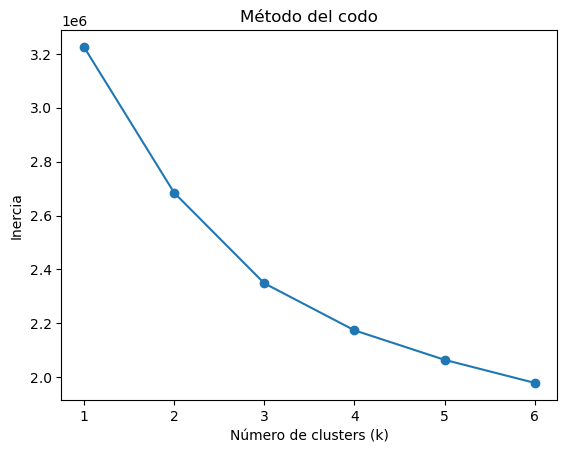

In [268]:
inertias = []
K = range(1, 7)  

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_final)
    inertias.append(kmeans.inertia_)

import matplotlib.pyplot as plt

plt.plot(K, inertias, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.show()


In [269]:
k_opt = 3

kmeans_final = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
kmeans_final.fit(x_final)

# Etiquetas de cluster
df_cluster["cluster"] = kmeans_final.labels_


In [270]:
X_sample = x_final.sample(n=10000, random_state=42)
labels_sample = kmeans_final.predict(X_sample)
sil = silhouette_score(X_sample, labels_sample)
print("Silhouette k=3:", sil)

Silhouette k=3: 0.16273102397392622


## PCA y visualización

In [271]:
# Reducir X_final a 2 dimensiones
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(x_final)

df_cluster["pca1"] = X_pca[:, 0]
df_cluster["pca2"] = X_pca[:, 1]


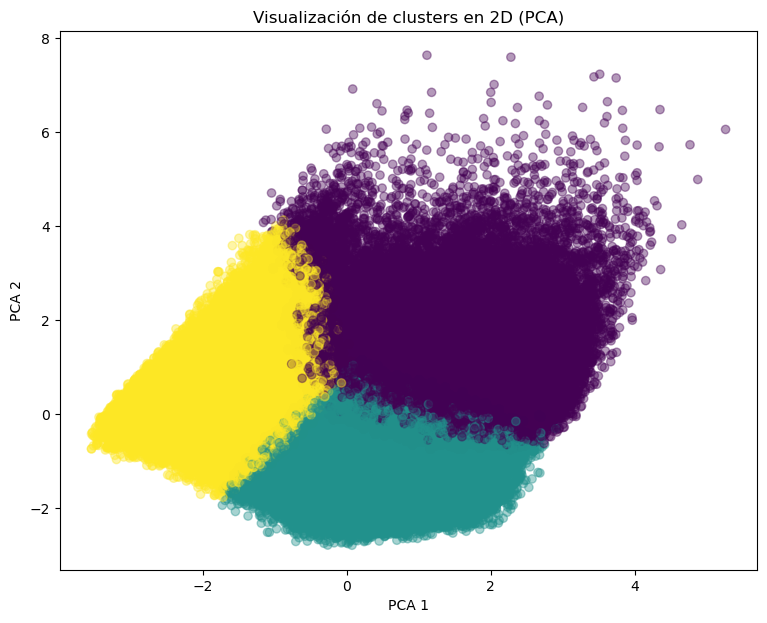

In [272]:
plt.figure(figsize=(9,7))
plt.scatter(df_cluster["pca1"], df_cluster["pca2"], 
            c=df_cluster["cluster"], cmap='viridis', alpha=0.4)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualización de clusters en 2D (PCA)")
plt.show()


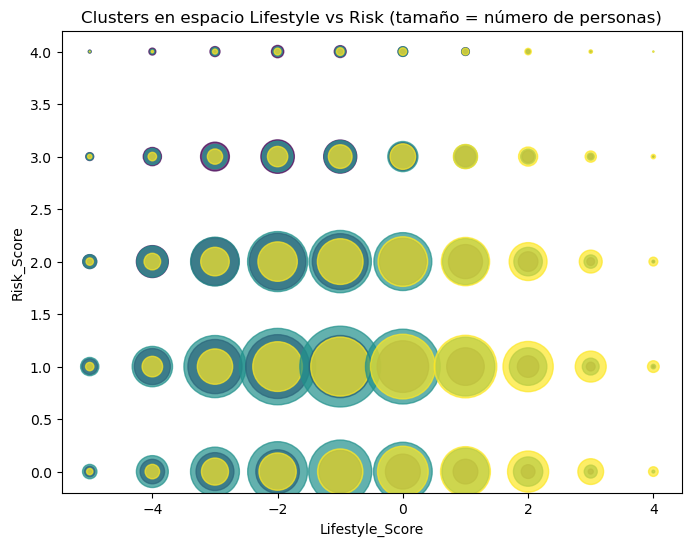

In [273]:
g = (
    df_cluster
    .groupby(["Lifestyle_Score", "Risk_Score", "cluster"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(8,6))
plt.scatter(
    g["Lifestyle_Score"],
    g["Risk_Score"],
    s=g["count"] / 5,         
    c=g["cluster"],
    cmap='viridis',
    alpha=0.7
)
plt.xlabel("Lifestyle_Score")
plt.ylabel("Risk_Score")
plt.title("Clusters en espacio Lifestyle vs Risk (tamaño = número de personas)")
plt.show()




In [274]:
df_cluster.groupby("cluster")[["Lifestyle_Score","Risk_Score"]].mean()


,Lifestyle_Score,Risk_Score
cluster,,
0,-1.439387,1.390873
1,-1.062972,1.147702
2,-0.095769,1.144223


## Statistics

In [275]:
df_cluster["cluster"].value_counts()


cluster
1    179794
2    120029
0    113945
Name: count, dtype: int64

In [276]:
df_cluster.groupby("cluster")[numeric_cols].mean().round(2)


,Age,Income_log,Lifestyle_Score,Risk_Score,Number of Children
cluster,,,,,
0,60.05,9.17,-1.44,1.39,1.53
1,54.71,11.04,-1.06,1.15,1.93
2,29.96,10.64,-0.10,1.14,0.14


In [277]:
df_cluster.groupby("cluster")[numeric_cols].agg(["mean", "std"]).round(2)


Age        Income_log       Lifestyle_Score       Risk_Score        \
          mean    std       mean   std            mean   std       mean   std   
cluster                                                                         
0        60.05  13.84       9.17  1.04           -1.44  1.56       1.39  0.95   
1        54.71  14.77      11.04  0.55           -1.06  1.64       1.15  0.90   
2        29.96  10.05      10.64  0.77           -0.10  1.73       1.14  0.90   

        Number of Children        
                      mean   std  
cluster                           
0                     1.53  1.15  
1                     1.93  1.12  
2                     0.14  0.41

In [278]:
cats_to_check = [
    "Income_level",      
    "Age_group",         
    "Marital Status",
    "Employment Status",
    "Education Level"
]

for col in cats_to_check:
    print(f"\nDistribución de {col} por cluster:")
    print(
        df_cluster
        .groupby("cluster")[col]
        .value_counts(normalize=True)
        .unstack()
        .round(2)
    )



Distribución de Income_level por cluster:
Income_level  High   Low  Middle
cluster                         
0              NaN  0.96    0.04
1             0.55  0.02    0.44
2             0.35  0.20    0.44

Distribución de Age_group por cluster:
Age_group  Child  Teen  Young Adult  Adult  Middle Age  Senior
cluster                                                       
0            0.0  0.00         0.06   0.19        0.34    0.41
1            0.0  0.00         0.11   0.31        0.30    0.29
2            0.0  0.11         0.65   0.18        0.06    0.00

Distribución de Marital Status por cluster:
Marital Status  Divorced  Married  Single  Widowed
cluster                                           
0                   0.08     0.64    0.01     0.27
1                   0.09     0.71     NaN     0.20
2                   0.06     0.33    0.59     0.02

Distribución de Employment Status por cluster:
Employment Status  Employed  Unemployed
cluster                                
0        

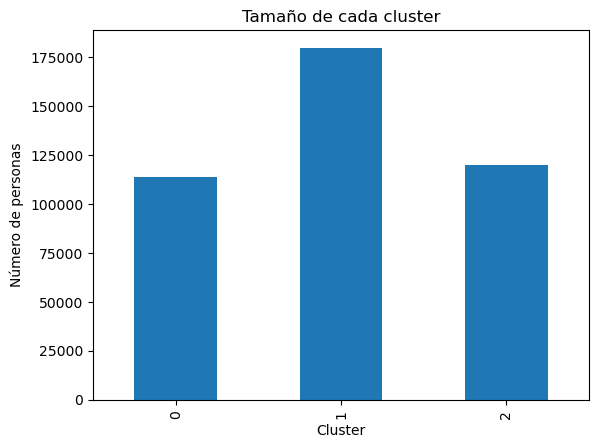

In [279]:
df_cluster["cluster"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Número de personas")
plt.title("Tamaño de cada cluster")
plt.show()


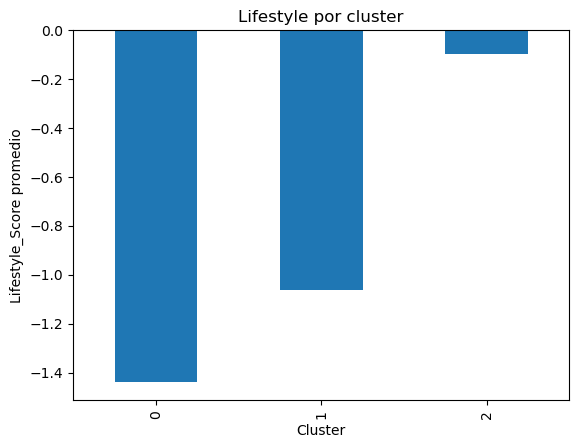

In [280]:
df_cluster.groupby("cluster")["Lifestyle_Score"].mean().plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Lifestyle_Score promedio")
plt.title("Lifestyle por cluster")
plt.show()


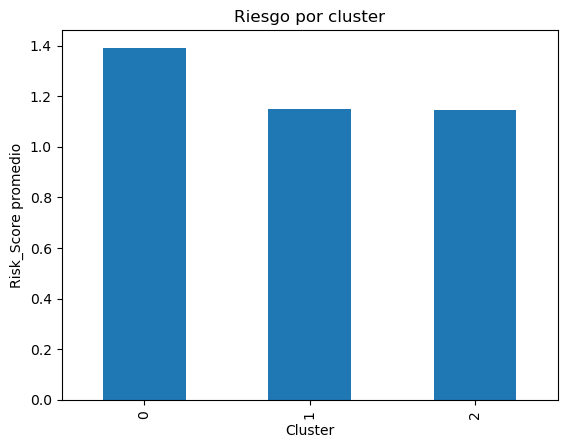

In [281]:
df_cluster.groupby("cluster")["Risk_Score"].mean().plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Risk_Score promedio")
plt.title("Riesgo por cluster")
plt.show()
